In [1]:
from QAOAUtils import *
from oputils import *


(CVXPY) Dec 26 09:18:34 PM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: The specified module could not be found.')


In [2]:
import matplotlib.lines as mlines
sym = mlines.Line2D([], [], color='#1f77b4', marker='.', linestyle='None',
                          markersize=15, label='MIS')

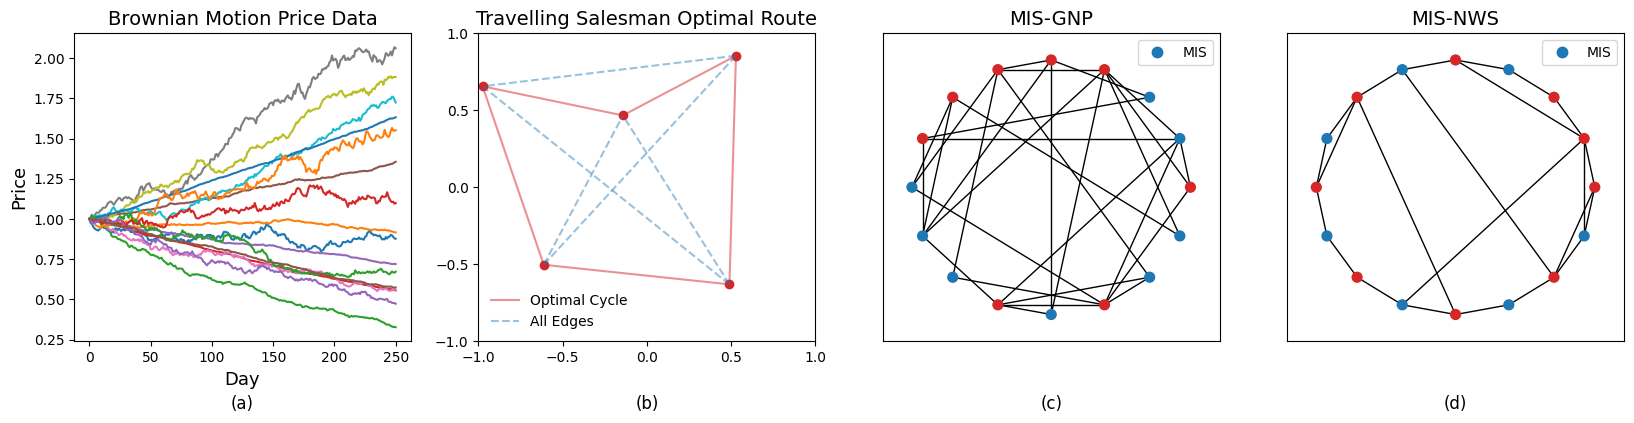

In [3]:
fig,ax = plt.subplots(1,4,figsize=(20,4))


prices =geometric_brownian_prices(max_drift=0.05,max_volatility=0.2,T=250,N=16)
ax[0].plot(prices)
ax[0].set_xlabel("Day", fontsize=13)
ax[0].set_ylabel("Price", fontsize=13)
ax[0].text(0.5,-0.22, "(a)", size=12, ha="center", 
         transform=ax[0].transAxes)
ax[0].set_title("Brownian Motion Price Data", fontsize=14)

m=0
while(m<0.75):
    points,dist,q = TSP_QUBO(5,1) ###resampl until aesthetic
    m=np.min(dist[np.nonzero(dist)])
order = np.concatenate(([0],np.argwhere(np.reshape(brute_force_max01(-q[-1])[0],(4,4))>0)[:,-1]+1,[0]))
ax[1].scatter(*points.T, c='#d62728')
ax[1].plot(*points[[order]].T,'-',label='Optimal Cycle', c='#d62728',alpha=0.5)
edges = [[i,j] for i in range(5) for j in range(i+1,5)]
for e in edges:
    if(e not in np.sort([[order[i],order[i+1]] for i in range(5)],axis=1).tolist()):
        ax[1].plot(*points[[e]].T,'--',alpha=0.45,color='#1f77b4')
ax[1].plot([0],[0],'--',label='All Edges',alpha=0.45,color='#1f77b4')
ax[1].legend(frameon=False)
x_min, x_max = -1, 1
y_min, y_max = -1, 1
ax[1].set_xlim(x_min, x_max)
ax[1].set_ylim(y_min, y_max)
x_range = x_max - x_min
y_range = y_max - y_min
tick_step = 0.5  # Example step size
ax[1].set_xticks(np.arange(x_min, x_max + tick_step, tick_step))
ax[1].set_yticks(np.arange(y_min, y_max + tick_step, tick_step))
ax[1].set_title("Travelling Salesman Optimal Route", fontsize=14)
ax[1].set_xlim(-1,1)
ax[1].set_ylim(-1,1)
ax[1].text(0.5,-0.22, "(b)", size=12, ha="center", 
         transform=ax[1].transAxes)

ax[2].set_title("MIS-GNP", fontsize=14)
ax[2].text(0.5,-0.22, "(c)", size=12, ha="center", 
         transform=ax[2].transAxes)
G=sample_graph(16)
pos = nx.circular_layout(G)#,k=.35)
l=np.argwhere(brute_force_max01(np.diag(np.ones(16))- (1.1/2) *nx.adjacency_matrix(G).toarray())[0]>0)[:,0]
nx.draw_networkx(G, pos,ax=ax[2],node_size=50,with_labels=False,node_color=['#1f77b4' if i in l else "#d62728" for i in range(16)])
ax[2].legend(handles=[sym])

ax[3].set_title("MIS-NWS", fontsize=14)
ax[3].text(0.5,-0.22, "(d)", size=12, ha="center", 
         transform=ax[3].transAxes)
G=sample_graph(16,"nws")
pos = nx.circular_layout(G)#,k=.75)
l=np.argwhere(brute_force_max01(np.diag(np.ones(16))- (1.1/2) *nx.adjacency_matrix(G).toarray())[0]>0)[:,0]
nx.draw_networkx(G, pos,ax=ax[3],node_size=50,with_labels=False,node_color=["#1f77b4" if i in l else "#d62728" for i in range(16)])
ax[3].legend(handles=[sym])
fig.savefig(r'Figures\Problem_Visualizer.pdf', dpi=300,bbox_inches="tight")


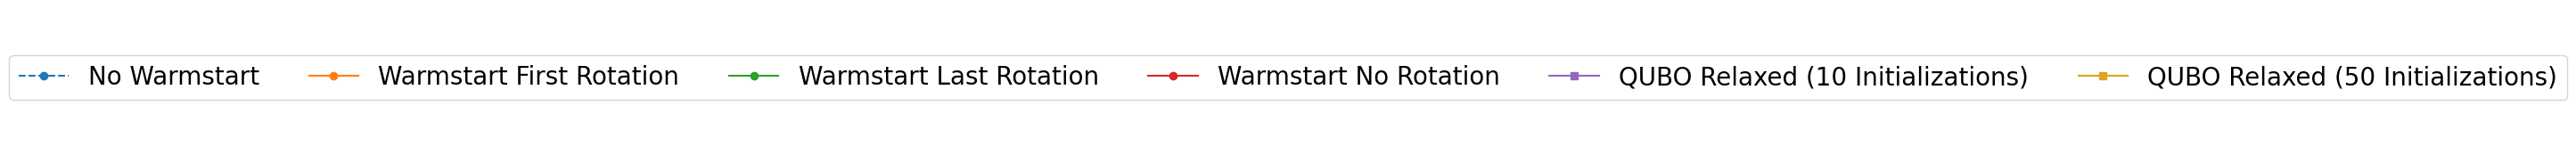

In [2]:
import matplotlib.pyplot as plt

def create_legend(path=None):
    # Create a dummy plot to access legend handles
    fig, ax = plt.subplots(figsize=(25, 2))  # Increased height for better visibility
    
    # Dummy data to generate legend entries
    line1, = ax.plot([], [], marker='o', linestyle='--', label='No Warmstart')
    line2, = ax.plot([], [], marker='o', label='Warmstart First Rotation')
    line3, = ax.plot([], [], marker='o', label='Warmstart Last Rotation')
    line4, = ax.plot([], [], marker='o', label='Warmstart No Rotation')
    line5, = ax.plot([], [], marker='s', label='QUBO Relaxed (10 Initializations)')
    line6, = ax.plot([], [], marker='s', label='QUBO Relaxed (50 Initializations)', color='goldenrod')

    # Create the legend with the appropriate labels and a larger fontsize
    ax.legend(handles=[line1, line2, line3, line4, line5, line6], 
              labels=['No Warmstart', 'Warmstart First Rotation', 'Warmstart Last Rotation', 'Warmstart No Rotation', 'QUBO Relaxed (10 Initializations)', 'QUBO Relaxed (50 Initializations)'], 
              loc='center', bbox_to_anchor=(0.5, 0.5), ncol=6, fontsize=20, frameon=True)  # Adjusted fontsize and ncol

    # Remove axis and ticks
    ax.axis('off')

    # Save the legend as a PDF if a path is provided
    if path is not None:
        plt.savefig(path + ".pdf", dpi=300, bbox_inches='tight')

    # Display the legend
    plt.show()

create_legend(path="Figures/Legend_Full_Comparison")


In [7]:
import fitz  # PyMuPDF

def combine_pdfs_without_divider(pdf_paths, output_path):
    # Create a new blank document
    combined_doc = fitz.open()

    # Iterate over each PDF
    for pdf_path in pdf_paths:
        # Open the current PDF
        pdf_doc = fitz.open(pdf_path)

        # Iterate over each page in the PDF
        for page_num in range(pdf_doc.page_count):
            page = pdf_doc.load_page(page_num)
            
            # Optionally crop the page to remove white space
            rect = page.rect  # Get the full page rectangle
            cropped_rect = fitz.Rect(rect.x0 + 5, rect.y0 + 5, rect.x1 - 3, rect.y1 - 3)  # Example: Remove 10 units from each side
            page.set_cropbox(cropped_rect)  # Crop the page

            # Add the current cropped page to the combined document
            combined_doc.insert_pdf(pdf_doc, from_page=page_num, to_page=page_num)

    # Save the combined PDF
    combined_doc.save(output_path)
    print(f"Combined PDF saved as {output_path}")

# List of PDF paths to combine
pdf_paths = ["Figures/RandomQUBOContinous/Full_Comparison.pdf",
             "Figures/RandomQUBODiscrete/Full_Comparison.pdf",
             "Figures/TSP/Full_Comparison.pdf", 
             "Figures/PortfolioOpt/Full_Comparison.pdf",
             "Figures/MIS-GNP/Full_Comparison.pdf", 
             "Figures/MIS-NWS/Full_Comparison.pdf"]
output_path = "Figures/Paper_Full_Comparison.pdf"

combine_pdfs_without_divider(pdf_paths, output_path)


Combined PDF saved as Figures/Paper_Full_Comparison.pdf


In [6]:
import fitz  # PyMuPDF

def combine_pdfs_horizontally(pdf1_path, pdf2_path, output_path):
    # Open the two PDFs
    pdf1 = fitz.open(pdf1_path)
    pdf2 = fitz.open(pdf2_path)
    
    # Create a new blank PDF for the output
    combined_doc = fitz.open()

    # Ensure both PDFs have the same number of pages
    page_count = min(pdf1.page_count, pdf2.page_count)

    for i in range(page_count):
        # Load the pages from both PDFs
        page1 = pdf1[i]
        page2 = pdf2[i]

        # Determine the new page size
        width = page1.rect.width + page2.rect.width
        height = max(page1.rect.height, page2.rect.height)
        new_page = combined_doc.new_page(width=width, height=height)

        # Place page1 and page2 side by side
        new_page.show_pdf_page(fitz.Rect(0, 0, page1.rect.width, page1.rect.height), pdf1, i)
        new_page.show_pdf_page(fitz.Rect(page1.rect.width, 0, width, page2.rect.height), pdf2, i)

    # Save the combined PDF
    combined_doc.save(output_path)
    print(f"Combined horizontally PDF saved as {output_path}")


def stack_pdfs_vertically(pdf_paths, output_path):
    # Open the new blank PDF for stacking
    combined_doc = fitz.open()

    # Loop through each PDF
    for pdf_path in pdf_paths:
        pdf = fitz.open(pdf_path)

        # Append each page of the PDF to the combined document
        for i in range(pdf.page_count):
            page = pdf[i]

            # Add the page directly into the combined document
            combined_doc.insert_pdf(pdf, from_page=i, to_page=i)

    # Save the stacked PDF as a single document (combined vertically)
    combined_doc.save(output_path)
    print(f"Stacked vertically PDF saved as {output_path}")


# Step 1: Combine PDFs horizontally for three pairs
horizontally_combined_pdfs = []
pairs = [
    ("Figures/RandomQUBOContinous/Full_Comparison_gw2.pdf", "Figures/RandomQUBODiscrete/Full_Comparison_gw2.pdf"),
    ("Figures/TSP/Full_Comparison_gw2.pdf", "Figures/PortfolioOpt/Full_Comparison_gw2.pdf"),
    ("Figures/MIS-GNP/Full_Comparison_gw2.pdf", "Figures/MIS-NWS/Full_Comparison_gw2.pdf")
]

# Combine the PDFs horizontally first
for idx, (pdf1, pdf2) in enumerate(pairs):
    output_path = f"Figures/combined_horizontally_{idx+1}.pdf"
    combine_pdfs_horizontally(pdf1, pdf2, output_path)
    horizontally_combined_pdfs.append(output_path)

# Add the 4th PDF directly to the list for stacking
horizontally_combined_pdfs.append("Figures/Legend_Full_Comparison.pdf")

# Step 2: Stack the horizontally combined PDFs and the extra 4th PDF into one final vertically stacked PDF
final_output_path = "Figures/final_combined.pdf"  # Final output in one file
stack_pdfs_vertically(horizontally_combined_pdfs, final_output_path)


Combined horizontally PDF saved as Figures/combined_horizontally_1.pdf
Combined horizontally PDF saved as Figures/combined_horizontally_2.pdf
Combined horizontally PDF saved as Figures/combined_horizontally_3.pdf
Stacked vertically PDF saved as Figures/final_combined.pdf


In [4]:
import fitz  # PyMuPDF

# Path to your PDF file
pdf_path = "Figures/combined_horizontally_1.pdf"  # Replace with your PDF file path

# Open the PDF
pdf = fitz.open(pdf_path)

# Loop through each page
for page_number in range(len(pdf)):
    page = pdf[page_number]
    print(f"Page {page_number + 1}:")
    
    # Extract images
    images = page.get_images(full=True)
    if images:
        for img_index, img in enumerate(images):
            xref = img[0]  # Reference number for the image
            base_image = pdf.extract_image(xref)  # Extract the image
            image_bytes = base_image["image"]  # Image data as bytes
            image_ext = base_image["ext"]  # Image file extension
            print(f"  - Found image {img_index + 1} with extension: {image_ext}")
    else:
        print("  - No images found on this page.")

# Close the PDF
pdf.close()

Page 1:
  - No images found on this page.
